In [1]:
# http://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py
# http://pytorch.org/docs/master/torchvision/datasets.html#mnist

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST

batch_size = 2
# データセットをダウンロード
mnist_data = MNIST('./', train=True, download=True, transform=transforms.ToTensor())
data_loader = DataLoader(mnist_data,
                         batch_size=batch_size,
                         shuffle=False)

In [3]:
# 中身を見てみる
data_iter = iter(data_loader)
images, labels = data_iter.next()

Label: tensor(5)


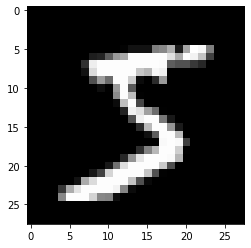

In [4]:
# matplotlibで1つ目のデータを可視化してみる
npimg = images[0].numpy()
npimg = npimg.reshape((28, 28))
plt.imshow(npimg, cmap='gray')
print('Label:', labels[0])

In [5]:
# 訓練データとテストデータを用意
train_data = MNIST('./', train=True, download=True, transform=transforms.ToTensor())
train_loader = DataLoader(mnist_data,
                         batch_size=batch_size,
                         shuffle=True)
test_data = MNIST('./', train=False, download=True, transform=transforms.ToTensor())
test_loader = DataLoader(test_data,
                         batch_size=batch_size,
                         shuffle=False)

In [6]:
# ニューラルネットワークを定義
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

"""
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(28 * 28, 50)
        self.l2 = nn.Linear(50, 10)
        
    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.l1(x)
        x = self.l2(x)
        return x
"""
"""
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        l1 = nn.Linear(28 * 28, 50)
        l2 = nn.Linear(50, 10)
        features = [l1, l2]
        self.features = nn.ModuleList(features).eval()
    
    def forward(self, x):
        results = []
        for ii , model in enumerate(self.features):
            x = model(x)
            results.append(x)
        return results
"""
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(28 * 28, 50)
        self.l2 = nn.Linear(50, 10)
        
    def forward(self, x):
        result = []
        x = x.view(-1, 28 * 28)
        x = self.l1(x)
        result.append(x)
        x = self.l2(x)
        result.append(x)
        return result 
        


net = Net()

In [7]:
# コスト関数と最適化手法を定義
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

In [9]:
for epoch in range(3):
    running_loss = 0.0
    for i, data in enumerate(train_loader):
        inputs, labels = data
        
        # Variableに変換
        inputs, labels = Variable(inputs), Variable(labels)
        
        # 勾配情報をリセット
        optimizer.zero_grad()
        
        # 順伝播
        outputs = net(inputs)[-1]
        
        # ロスの計算
        loss = criterion(outputs, labels)
        
        # 逆伝播
        loss.backward()
        
        # パラメータの更新
        optimizer.step()
        
        running_loss += loss.item()
        
        if i % 5000 == 4999:
            print('%d %d loss: %.3f' % (epoch + 1, i + 1, running_loss / 1000))
            running_loss = 0.0
            
print('Finished Training')

1 5000 loss: 1.485


1 10000 loss: 1.499


1 15000 loss: 1.511


1 20000 loss: 1.483


1 25000 loss: 1.500


1 30000 loss: 1.464


2 5000 loss: 1.447


2 10000 loss: 1.473


2 15000 loss: 1.421


2 20000 loss: 1.454


2 25000 loss: 1.546


2 30000 loss: 1.468


3 5000 loss: 1.400


3 10000 loss: 1.356


3 15000 loss: 1.441


3 20000 loss: 1.544


3 25000 loss: 1.500


3 30000 loss: 1.470
Finished Training


In [10]:
import torch

correct = 0
total = 0
for data in test_loader:
    inputs, labels = data
    outputs = net(Variable(inputs))[-1]
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print('Accuracy %d / %d = %f' % (correct, total, correct / total))

Accuracy 9215 / 10000 = 0.000000


Label: tensor(7)


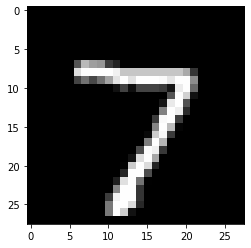

In [12]:
test_iter = iter(test_loader)
inputs, labels = test_iter.next()
outputs = net(Variable(inputs))
_, predicted = torch.max(outputs[-1].data, 1)

plt.imshow(inputs[0].numpy().reshape(28, 28), cmap='gray')
print('Label:', predicted[0])

## モデルのパラメータ

In [13]:
net.state_dict()

OrderedDict([('l1.weight',
              tensor([[-0.0253,  0.0209, -0.0085,  ..., -0.0151, -0.0153,  0.0191],
                      [ 0.0115,  0.0089, -0.0258,  ..., -0.0312,  0.0327, -0.0339],
                      [ 0.0139, -0.0205,  0.0219,  ..., -0.0139,  0.0179, -0.0068],
                      ...,
                      [-0.0270,  0.0344,  0.0026,  ..., -0.0123, -0.0232,  0.0273],
                      [ 0.0083,  0.0017,  0.0279,  ...,  0.0061, -0.0117,  0.0150],
                      [ 0.0180,  0.0212, -0.0243,  ...,  0.0207,  0.0265, -0.0018]])),
             ('l1.bias',
              tensor([-0.1493,  0.4183, -0.1449, -0.2421,  0.1941, -0.4093,  0.1630,  0.2022,
                      -0.5520, -0.2854, -0.1448,  0.2979, -0.6491, -0.6032, -0.1244, -0.3652,
                      -0.5688, -0.0542,  0.0148,  0.2777,  0.2756, -0.4582, -0.4746, -0.6879,
                      -0.4765,  0.0179,  0.0734,  0.1856, -0.0467,  0.1836,  0.1440,  0.1437,
                      -0.1264, -0.3403

In [14]:
test_iter = iter(test_loader)
inputs, labels = test_iter.next()
outputs = net(Variable(inputs))

print(outputs)

[tensor([[-0.9345, -2.8194, -0.1076,  1.7164,  2.5551,  3.6856, -0.7404,  0.2815,
          0.7459,  0.8644, -0.5280,  2.1950, -0.2528, -0.4930, -1.4909,  2.2611,
          0.7013, -0.4296,  2.2300,  1.1574,  1.8148,  0.8713,  0.9056,  1.4795,
          0.6134, -2.3216,  0.6827, -0.3175,  0.6002,  3.2347, -1.3936, -1.4105,
          1.6923,  0.0535, -3.0620, -1.3513, -1.0643,  0.2707,  2.9757, -0.5376,
          2.8273, -1.8292,  1.5670, -0.3347,  3.5176, -0.2267,  0.6913, -0.4770,
          0.5490, -1.2954],
        [ 1.9483,  0.3092,  1.3623,  2.4379, -1.3846, -0.7516, -2.5465, -1.0207,
         -0.9236, -3.9366, -2.4810, -0.1427,  2.7703,  2.6778,  0.4053, -1.5932,
          5.6889,  3.7129, -2.9750,  0.4085, -2.3200, -1.8269,  3.3408,  0.7031,
          0.6249,  3.2133,  2.8800, -2.7476,  4.9950, -3.2677,  2.5939,  0.4411,
          4.8498,  0.5942,  2.4129,  3.6772,  0.3999,  2.5068, -3.2368, -0.7109,
         -1.8589,  1.8948, -1.2778,  2.0353, -3.2767, -1.7179,  1.7729, -2.3717,

In [15]:
print(len(outputs))  # num_layer
print(len(outputs[0])) # batch_num
print(len(outputs[0][0])) # num_output_node


2
2
50
